### Data Augmentation
As identified through our exploratory data analysis (EDA), our dataset exhibits an imbalance. To enhance the performance of our models, we will conduct data augmentation techniques to address this issue. This involves increasing the size of our minority class, which comprises screaming audio samples, in a more realistic and natural manner. Our approach will involve two types of data augmentation: firstly, by adding background noise, and secondly, applying random time shifting to our audio samples.

## Handling Imbalanced Data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_audios_file_path = '/content/drive/My Drive/DeepLearning/code/dataset/Train_audios'
noise_file_path = '/content/drive/My Drive/DeepLearning/code/dataset/Noise'
da_train_file_path = '/content/drive/My Drive/DeepLearning/code/dataset/Train_audios_augmentation'

#### Add Noise

In this section, we will augment our screaming dataset by adding various realistic noises to increase the number of screaming audio samples. These noises include sounds such as those from crowded places, urban areas with people talking, restaurants, workplaces with discussions, mosquito sounds, car traffic, rainy days, motorbikes with people talking, and festival ambiance. Each noise will be randomly added to each audio sample. Our goal is to double the number of screaming samples in our dataset through this augmentation process.

In [ ]:
import os
import numpy as np
import librosa
import random
import soundfile as sf

def add_random_noise_to_audio_files(input_folder, noise_folder, output_folder, noise_level=0.4):
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    # List all noise files
    noise_files = [f for f in os.listdir(noise_folder) if f.endswith('.wav')]

    # Get lists of class 0 and class 1 files
    class_0_files = [f for f in os.listdir(input_folder) if f.endswith('_0.wav')]
    class_1_files = [f for f in os.listdir(input_folder) if f.endswith('_1.wav')]

    # Add noise to all class 1 files
    for file_name in class_1_files:
        input_path = os.path.join(input_folder, file_name)
        output_path = os.path.join(output_folder, f"noisy_{file_name}")

        # Choose a random noise file
        noise_file = os.path.join(noise_folder, random.choice(noise_files))

        add_noise(input_path, noise_file, output_path, noise_level)

    # Add noise to 20% of class 0 files
    num_class_0_to_modify = int(len(class_0_files) * 0.2)
    class_0_files_to_modify = random.sample(class_0_files, num_class_0_to_modify)

    for file_name in class_0_files_to_modify:
        input_path = os.path.join(input_folder, file_name)
        output_path = os.path.join(output_folder, f"noisy_{file_name}")

        # Choose a random noise file
        noise_file = os.path.join(noise_folder, random.choice(noise_files))

        add_noise(input_path, noise_file, output_path, noise_level)

def add_noise(audio_path, noise_path, output_path, noise_level=0.2):
    # Load audio file
    audio, sr = librosa.load(audio_path, sr=None)

    # Load background noise
    noise, _ = librosa.load(noise_path, sr=None)

    # Ensure that the noise has the same duration as the audio
    if len(noise) < len(audio):
        noise = np.tile(noise, int(np.ceil(len(audio) / len(noise))))

    # Trim or pad the noise to match the duration of the audio
    noise = noise[:len(audio)]

    # Scale the noise according to the desired noise level
    scaled_noise = noise * noise_level

    # Add the scaled noise to the audio
    noisy_audio = audio + scaled_noise

    # Write the noisy audio to a new file
    sf.write(output_path, noisy_audio, sr)

    print(f"Noise level {noise_level} added to {audio_path} using {noise_path}")

add_random_noise_to_audio_files(train_audios_file_path, noise_file_path, da_train_file_path, noise_level=0.4)


Noise level 0.4 added to /content/drive/My Drive/DeepLearning/code/dataset/Train_audios/jc8SPqDauFA_out_1.wav using /content/drive/My Drive/DeepLearning/code/dataset/Noise/traffic-jam-22579.wav
Noise level 0.4 added to /content/drive/My Drive/DeepLearning/code/dataset/Train_audios/6UP3giSp8cI_out_1.wav using /content/drive/My Drive/DeepLearning/code/dataset/Noise/rain-sound-188158.wav
Noise level 0.4 added to /content/drive/My Drive/DeepLearning/code/dataset/Train_audios/Hu18136at0Y_out_1.wav using /content/drive/My Drive/DeepLearning/code/dataset/Noise/rain-sound-188158.wav
Noise level 0.4 added to /content/drive/My Drive/DeepLearning/code/dataset/Train_audios/g1GM3tTisYg_out_1.wav using /content/drive/My Drive/DeepLearning/code/dataset/Noise/nature-soundstropicaljunglebirds-108380.wav
Noise level 0.4 added to /content/drive/My Drive/DeepLearning/code/dataset/Train_audios/_OAmHm2hHGk_out_1.wav using /content/drive/My Drive/DeepLearning/code/dataset/Noise/rain-sound-188158.wav
Noise le

### Time Shift

In [ ]:
import numpy as np
import random
import os
import librosa
import soundfile as sf

def time_shift(signal, shift_limit):
    sig_len = signal.shape[0]
    shift_amt = int(random.uniform(-shift_limit, shift_limit) * sig_len)
    shifted_signal = np.roll(signal, shift_amt)
    return shifted_signal

def augment_screaming_dataset_with_time_shift(input_folder, output_folder, shift_limit=0.2, fraction=0.5):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Get all class 1 audio file names
    class_1_files = [f for f in os.listdir(input_folder) if f.endswith('_1.wav')]
    # Randomly select 50% of the class 1 files
    selected_files = random.sample(class_1_files, int(fraction * len(class_1_files)))

    print(f"Selected files for time shifting: {selected_files}")

    for file_name in selected_files:
        file_path = os.path.join(input_folder, file_name)

        print(f"Processing file: {file_path}")

        signal, sr = librosa.load(file_path, sr=None)

        # Apply time shift
        shifted_signal = time_shift(signal, shift_limit)

        output_file_name = f"shifted_{file_name}"
        output_path = os.path.join(output_folder, output_file_name)
        sf.write(output_path, shifted_signal, sr)
        print(f"Time-shifted audio saved to {output_file_name}")


# Apply time shifting to 50% of the screaming dataset belonging to class 1
augment_screaming_dataset_with_time_shift(train_audios_file_path, da_train_file_path, shift_limit=0.2, fraction=0.5)


Selected files for time shifting: ['RoiA7OuNqSc_out_1.wav', 'NKMb5_sAkxc_out_1.wav', '2o5phG83XgU_out_1.wav', '4NetAxSbj-Y_out_1.wav', 'p52_K2ToaP8_out_1.wav', '0_hnDV2SHBI_out_1.wav', '0b24w9l0flA_out_1.wav', 'G_-3oPXHjLI_out_1.wav', '0soaJKVZ8cM_out_1.wav', '9xWCpsfgg1M_out_1.wav', 'Ck17fc7X_sk_out_1.wav', 'wng1ep_j6dw_out_1.wav', 'a6m6zP8H7V8_out_1.wav', 'pLkhhQWCAxc_out_1.wav', 'YAl7d8jJJaU_out_1.wav', 'axE2eg5A7tI_out_1.wav', 'fThwUtp9sWU_out_1.wav', 'ipfmCUYrto8_out_1.wav', 'TlFSjfGa5Bc_out_1.wav', 'qRAdhj9Lzt8_out_1.wav', 'wjpmyeC_RD0_out_1.wav', 'd7j7lYqobpw_out_1.wav', 'FG9_-vCAG8g_out_1.wav', '714_cN51H7U_out_1.wav', 'eJRxB2EvJos_out_1.wav', 'K0korwnQLa0_out_1.wav', 'PxGrPwR4aMs_out_1.wav', 'wfVlCMVVdeQ_out_1.wav', 'WFfkEBERZz4_out_1.wav', '9bM_mkoP3lw_out_1.wav', 'BFyA47oNp94_out_1.wav', '7ghFQZ6tFS0_out_1.wav', '9UhhRu-0iyA_out_1.wav', 'MwMky2YsdqM_out_1.wav', 'k9UC0DwpPLo_out_1.wav', 'r1Z5_gSxMpA_out_1.wav', 'ygAoDKnuXRU_out_1.wav', 'TRuWw52s8k4_out_1.wav', 'XjGiiesddM4_ou

In [ ]:
import shutil
def copy_audios(source_folder, destination_folder):
    # Ensure the destination folder exists
    os.makedirs(destination_folder, exist_ok=True)

    # Get the list of all files in the source folder
    files = os.listdir(source_folder)

    # Iterate over each file in the source folder
    for file_name in files:
        # Check if the file is an audio file (you can adjust this condition based on your file extensions)
        if file_name.endswith('.wav'):
            # Construct the source and destination paths
            source_path = os.path.join(source_folder, file_name)
            destination_path = os.path.join(destination_folder, file_name)

            # Copy the file from the source to the destination
            shutil.copyfile(source_path, destination_path)
            print(f"File '{file_name}' copied successfully to '{destination_folder}'")

copy_audios(train_audios_file_path, da_train_file_path)

File 'jc8SPqDauFA_out_1.wav' copied successfully to '/content/drive/My Drive/DeepLearning/code/dataset/Train_audios_augmentation'
File 'aQ2B2BTWfJU_out_0.wav' copied successfully to '/content/drive/My Drive/DeepLearning/code/dataset/Train_audios_augmentation'
File 'MiWskwqOMrg_out_0.wav' copied successfully to '/content/drive/My Drive/DeepLearning/code/dataset/Train_audios_augmentation'
File 'G6G1Amupivo_out_0.wav' copied successfully to '/content/drive/My Drive/DeepLearning/code/dataset/Train_audios_augmentation'
File '6UP3giSp8cI_out_1.wav' copied successfully to '/content/drive/My Drive/DeepLearning/code/dataset/Train_audios_augmentation'
File 'DSa3YoTNoZA_out_0.wav' copied successfully to '/content/drive/My Drive/DeepLearning/code/dataset/Train_audios_augmentation'
File 'yoK4rannXCw_out_0.wav' copied successfully to '/content/drive/My Drive/DeepLearning/code/dataset/Train_audios_augmentation'
File 'rCM5ba8Pz20_out_0.wav' copied successfully to '/content/drive/My Drive/DeepLearning/

In [ ]:
import os
import numpy as np
import pandas as pd
import librosa
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

def pad_audio(audio, sr, max_length):
    max_len_samples = int(max_length * sr)
    if len(audio) < max_len_samples:
        # Pad the audio with zeros (silence)
        padding = max_len_samples - len(audio)
        audio = np.pad(audio, (0, padding), mode='constant')
    else:
        # Truncate the audio
        audio = audio[:max_len_samples]
    return audio

def extract_features(file_path):
    max_length = 10.0
    y, sr = librosa.load(file_path, sr=None)
    y = pad_audio(y, sr, max_length)
    features = []

    # Extract features
    duration = librosa.get_duration(y=y, sr=sr)
    amplitude = np.max(np.abs(y))
    zcr = np.mean(librosa.feature.zero_crossing_rate(y))
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13), axis=1)
    chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=12), axis=1)
    mel_spectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40), axis=1)
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    spectral_flux = np.mean(librosa.onset.onset_strength(y=y, sr=sr))
    spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr))
    spectral_flatness = np.mean(librosa.feature.spectral_flatness(y=y))
    rms = np.mean(librosa.feature.rms(y=y))
    energy = np.sum(y**2)

    # Append all features to the list
    features.extend([duration, amplitude, zcr, spectral_centroid, spectral_bandwidth, spectral_rolloff, spectral_flux, spectral_flatness, rms, energy])
    features.extend(mfcc)
    features.extend(chroma)
    features.extend(mel_spectrogram)
    features.append(spectral_contrast)  # Append the float value as an element in the list

    return np.array(features)

def load_and_preprocess_data(scream_folder):
    features = []
    labels = []

    # Load scream data
    for filename in os.listdir(scream_folder):
        if filename.endswith('.wav'):
            path = os.path.join(scream_folder, filename)
            feature = extract_features(path)
            features.append(feature)

            # Assign labels based on file name suffix
            if filename.endswith('_out_1.wav'):
                labels.append(1)  # Scream
            elif filename.endswith('_out_0.wav'):
                labels.append(0)  # Non-scream

    X = np.array(features)
    y = np.array(labels)

    audio_data_df = pd.DataFrame(X)

    csv_path = '/content/drive/My Drive/DeepLearning/code/dataset/audio_data_noise_shift.csv'
    audio_data_df.to_csv(csv_path, index=False)

    # Encode labels using LabelEncoder
    le = LabelEncoder()
    y = le.fit_transform(y)

    # Convert to one-hot encoding
    y = to_categorical(y)

    return X, y

# Example usage
scream_folder = 'path_to_scream_folder'
X, y = load_and_preprocess_data(da_train_file_path)

/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [ ]:
X.shape

(4210, 76)

In [ ]:
save_dir = '/content/drive/My Drive/DeepLearning/code/dataset'

np.savetxt(os.path.join(save_dir, "train_data_noise_shift.csv"), X, delimiter=",")
np.savetxt(os.path.join(save_dir, "train_labels_noise_shift.csv"), y, delimiter=",")

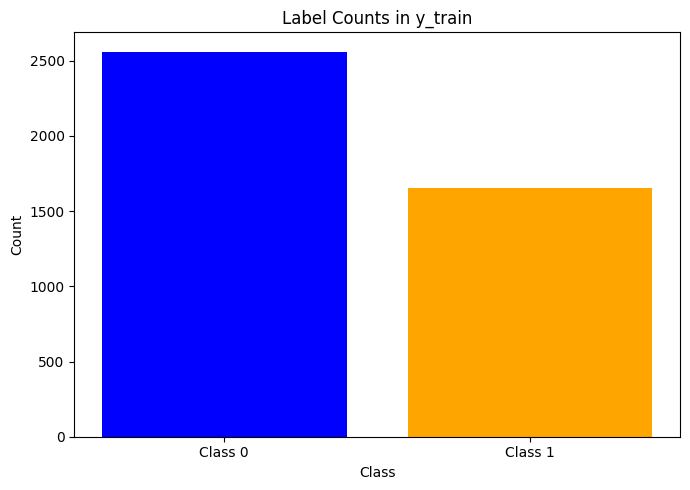

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class_counts = np.sum(y, axis=0)

# Create a bar chart
plt.figure(figsize=(7, 5))
plt.bar(np.arange(len(class_counts)), class_counts, color=['blue', 'orange'])
plt.title('Label Counts in y_train')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(np.arange(len(class_counts)), ['Class 0', 'Class 1'])

# Display the plot
plt.tight_layout()
plt.show()
